In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
df = pd.read_csv('data/bank-full.csv', sep=';')

___
# Attribute Information:
## Input variables:
### bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'))<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed))<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'))<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown'))<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown'))<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown'))
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone'))<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec'))<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri'))<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.)
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact))<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted))<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric))<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric))<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric))<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric))<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric))<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


___
# Plot Types

There are several plot types built into pandas; most of them are statistical by nature:

<pre>
df.plot.hist()     histogram
df.plot.bar()      bar chart
df.plot.barh()     horizontal bar chart
df.plot.line()     line chart
df.plot.area()     area chart
df.plot.scatter()  scatter plot
df.plot.box()      box plot
df.plot.kde()      kde plot
df.plot.hexbin()   hexagonal bin plot
df.plot.pie()      pie chart</pre>

You can also call specific plots by passing their name as an argument, as with `df.plot(kind='area')`.

___
## Histograms
This is one of the most commonly used plots. Histograms describe the distribution of continuous data by dividing the data into "bins" of equal width, and plotting the number of values that fall into each bin.

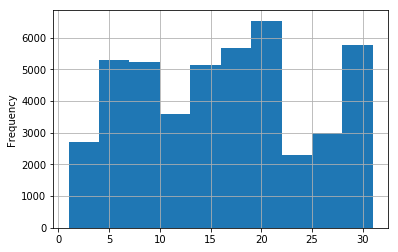

In [29]:
df['day'].plot.hist(grid=True);

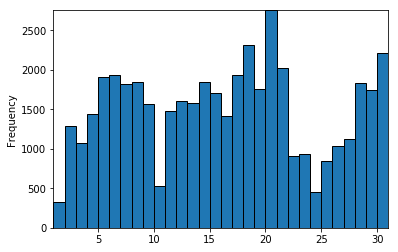

In [33]:
# let's plot it on 30 bin as total number of days in a month are 30
df['day'].plot.hist(bins=30, edgecolor='k').autoscale(enable=True, axis='both', tight=True)

tight- it will make sure to fit the x and y axis as per values and no extra space <BR>
axis - this determines the axis to fit the tight on <br>
bins - determines in how many bins to distribute data <br>

edgecolor, such as 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'<br>
autoscale the axis can be set to 'x', 'y' or 'both'

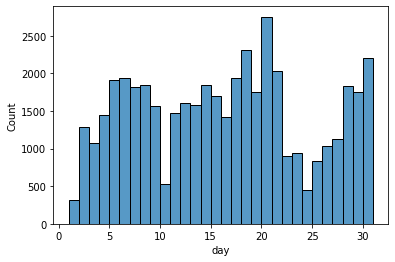

In [17]:
sns.histplot(df['day'], bins=30);

___
## Barplots
Barplots are similar to histograms, except that they deal with discrete data, and often reflect multiple variables.<br>
for more details visit <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html'>barplot</a>

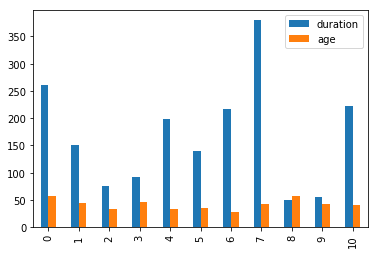

In [11]:
df[['duration', 'age']].loc[:10].plot.bar();

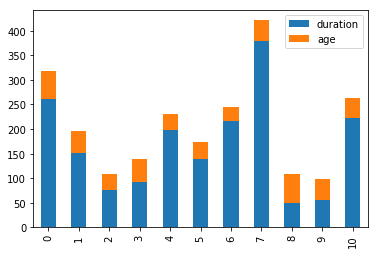

In [23]:
df[['duration', 'age']].loc[:10].plot.bar(stacked=True);

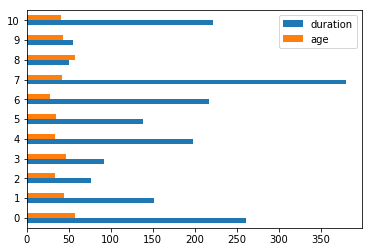

In [13]:
# USE .barh() TO DISPLAY A HORIZONTAL BAR PLOT
df[['duration', 'age']].loc[:10].plot.barh();

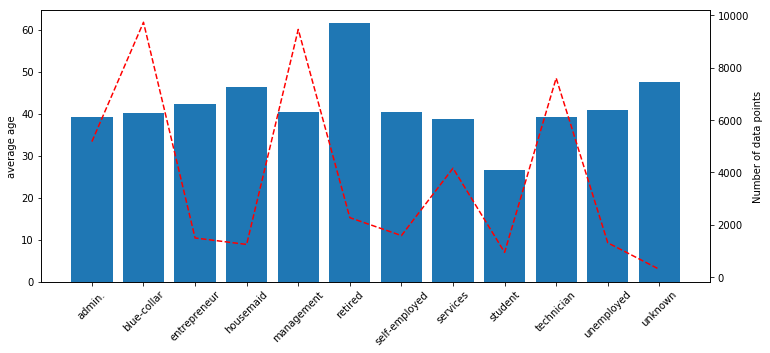

In [21]:
# distribution of a particular feature grouping by another feature
hist_data = df.groupby('job')['age'].agg(['count', 'mean'])
x_ticks = hist_data.index.values
hist_data = hist_data.reset_index()
fig, ax1 = plt.subplots(figsize=(12, 5))

# combine two x axis
ax2 = ax1.twinx()
ax1.set_xlabel('')
ax1.set_ylabel('average age')
ax2.set_ylabel('Number of data points')

ax1.bar(range(len(hist_data)), 'mean', data=hist_data)
ax2.plot(range(len(hist_data)), 'count', data=hist_data, color = 'red', label = 'Number of data points', linestyle='dashed')
plt.xticks(range(len(x_ticks)), x_ticks)
# change alignment of x axis labels
ax1.tick_params(axis='x', rotation=45)


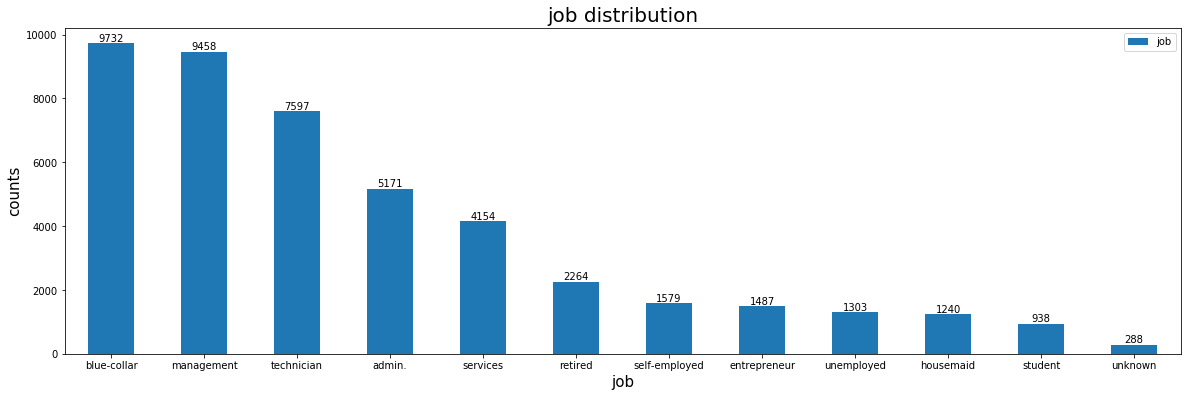

In [15]:
# distribution of a particular feature with counts written on top of bar
plot_data = df['job'].value_counts()
ax = plot_data.plot.bar(figsize=(20,6))
x_labels = list(plot_data.index)
ax.set_ylabel('counts', fontsize=15)
ax.set_xlabel('job', fontsize=15)
ax.set_title('job distribution', fontsize=20)
ax.set_xticklabels(x_labels, rotation=0)
ax.legend(labels=['job'])
# add labels on bars
rects = ax.patches
labels = plot_data.values
for i, rect in enumerate(rects):
    ax.annotate(labels[i], xy=(i, rect.get_height()), ha='center', va='bottom')
plt.show()
#plt.savefig('.png', dpi=plt.gcf().dpi, bbox_inches='tight')


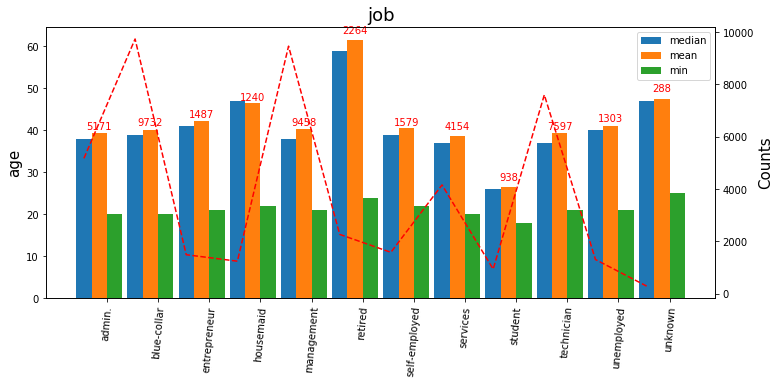

In [32]:
# distribution of a features wrt a categorical feature
data = df.groupby(['job'])['age'].describe()[['mean', '50%', 'min', 'count']]

labels = data.index.values
x = np.arange(len(labels))
width = 0.9
fig, ax1 = plt.subplots(figsize=(12, 5))

# plot bars for min, median and mean house price
rects1 = ax1.bar(x-width/2, data['50%'], width/3, label='median')
rects2 = ax1.bar(x-width/6, data['mean'], width/3, label='mean')
rects3 = ax1.bar(x+width/6, data['min'], width/3, label='min')

ax1.set_ylabel('age', fontsize=15)
ax1.set_title('job', fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=85)
ax1.legend()

# plot counts of data points
ax2 = ax1.twinx()
ax2.set_ylabel('Counts', fontsize=15)
ax2.plot(x-width/2, data['count'], color='red', linestyle='dashed')

# annotate counts of data points
for i, rect in enumerate(rects2):
    height = int(round(rect.get_height()))
    ax1.annotate('{}'.format(int(data['count'].iloc[i])),
                 xy=(rect.get_x() + rect.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', color='red')
plt.show()

for more details check- https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

___
## Pie Plots

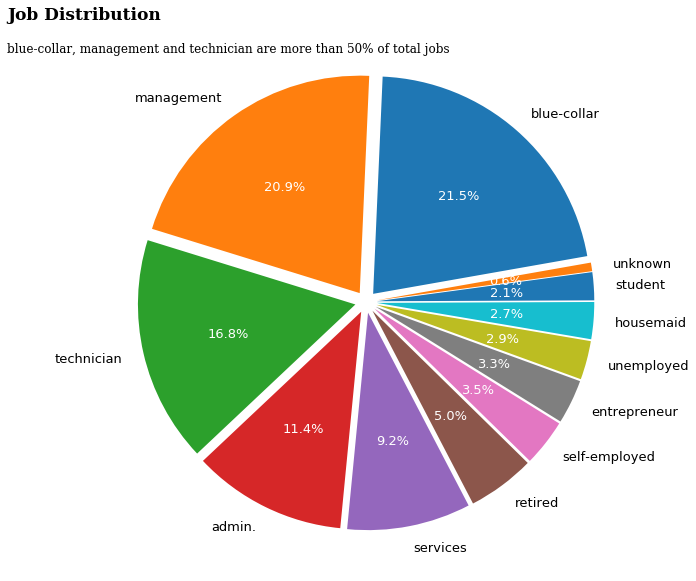

In [32]:
# looking at job distribution
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(df['job'].value_counts(), autopct='%1.1f%%', 
                                    labels=df['job'].value_counts().index,
                                    shadow=False, startangle=10, explode=[0.05]*len(df['job'].unique()));#, colors=['#91b8bd', '#244747']);
plt.setp(texts, size=13);
plt.setp(autotexts, size=13, color='white');
plt.text(-1.65, 1.3, 'Job Distribution', fontfamily='serif', fontsize=17, fontweight='bold');
plt.text(-1.65, 1.15, 'blue-collar, management and technician are more than 50% of total jobs', fontfamily='serif', fontsize=12);
plt.show()

___
## Scatter Plots
Scatter plots are a useful tool to quickly compare two variables, and to look for possible trends.

In [22]:
data = pd.read_csv('data/advertising.csv')
data = data[data['Radio']>0]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


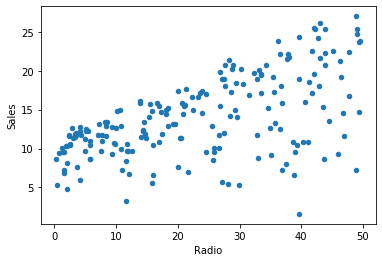

In [23]:
data.plot.scatter(x='Radio', y='Sales');

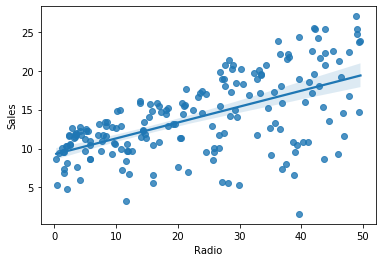

In [30]:
sns.regplot(x='Radio', y='Sales', data=data)
plt.show()

### Scatter plots with colormaps
You can use <strong>c</strong> to color each marker based off another column value. Use `cmap` to indicate which colormap to use.<br>

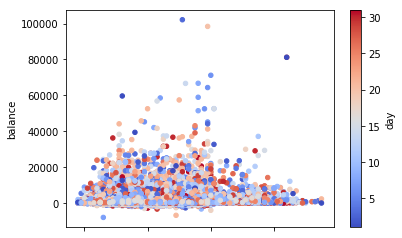

In [42]:
df.plot.scatter(x='age', y='balance', c='day', cmap='coolwarm');

### Scatter plots with sized markers
Alternatively you can use <strong>s</strong> to indicate marker size based off another column. The <strong>s</strong> parameter needs to be an array, not just the name of a column:

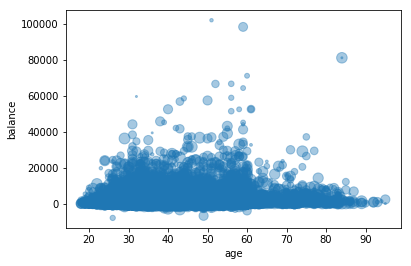

In [51]:
df.plot.scatter(x='age', y='balance', s=df['day']*4, alpha=0.4);

___
## BoxPlots
Box plots, aka "box and whisker diagrams", describe the distribution of data by dividing data into <em>quartiles</em> about the mean.<br>

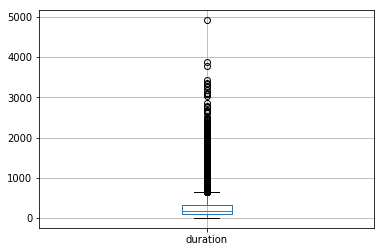

In [63]:
df[['duration']].boxplot()

### Boxplots with Groupby
To draw boxplots based on groups, first pass in a list of columns you want plotted (including the groupby column), then pass <strong>by='columname'</strong> into <tt>.boxplot()</tt>. Here we'll group records by the <strong>'e'</strong> column, and draw boxplots for the <strong>'b'</strong> column.

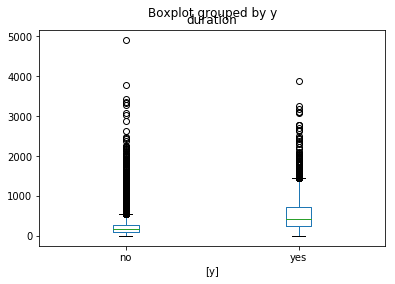

In [73]:
df[['y', 'duration']].boxplot(by='y', grid=False);

___
## Line Plots
Line plots are used to compare two or more variables. By default the x-axis values are taken from the index.

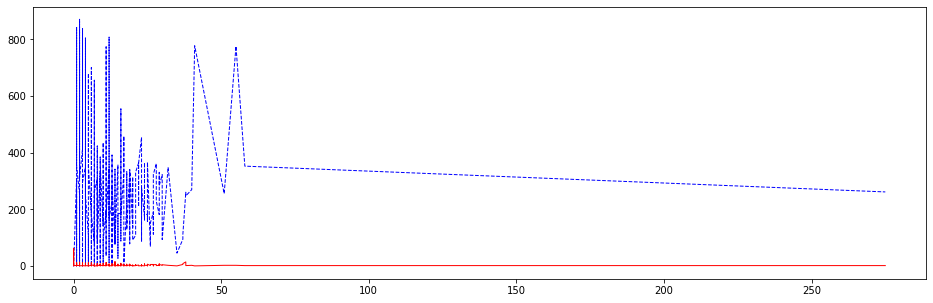

In [26]:
df1 = df.sort_values(by='previous').reset_index()
plt.figure(figsize=(16, 5))

line1 = plt.plot(df1['previous'], df1['pdays'])
plt.setp(line1, color='b', linewidth=1, linestyle='--')

line2 = plt.plot(df1['previous'], df1['campaign'])
plt.setp(line2, color='r', linewidth=1, linestyle='-')

plt.show()

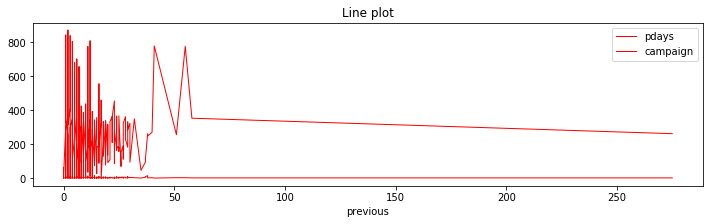

In [14]:
df1 = df.sort_values(by='previous').reset_index()
df1.plot.line(y=['pdays', 'campaign'], x='previous', figsize=(12,3), lw=1, ls='-', c='red', title='Line plot')

	linestyle	ls	'-'	solid line (default)
	linestyle	ls	'--'	dashed line
	linestyle	ls	'-.'	dashed/dotted line
	linestyle	ls	':'	dotted line

___
## Area Plots
Area plots represent cumulatively stacked line plots where the space between lines is emphasized with colors.

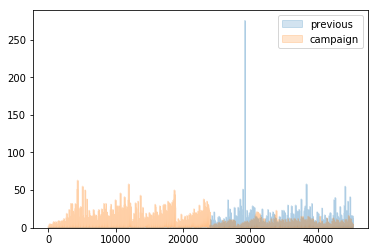

In [110]:
df[['previous', 'campaign']].plot.area(alpha=0.2, stacked=False)

___
## Kernel Density Estimation (KDE) Plot

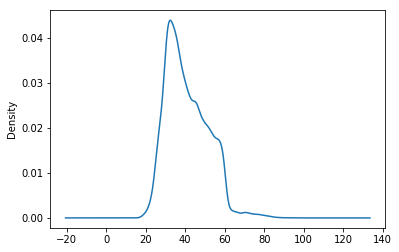

In [114]:
#df['age'].plot.kde();
df['age'].plot.density();

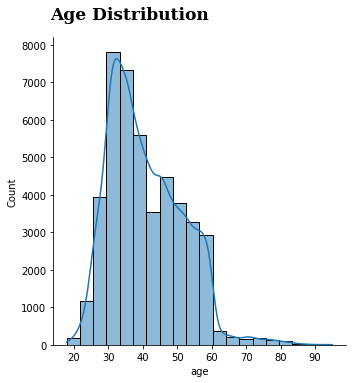

In [9]:
# univariate
sns.displot(x='age', data=df, kde=True, bins=20);
plt.figtext(0.15, 1.02, 'Age Distribution', fontfamily='serif', fontsize=17, fontweight='bold');

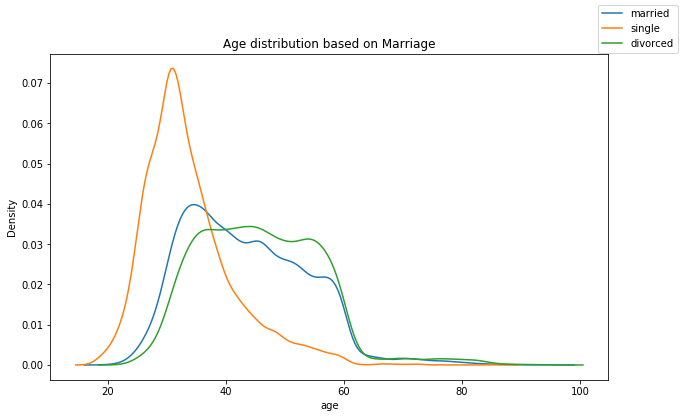

In [13]:
# bivariate
fig = plt.figure(figsize=(10,6))

for value in df['marital'].unique():
    sns.kdeplot(df[df['marital']==value]['age'])

fig.legend(labels=df['marital'].unique())
plt.title('Age distribution based on Marriage')
plt.show()

___
## Correlation Plot

In [26]:
data = pd.read_csv('data/advertising.csv')
data = data[(data['Radio']>0) & (data['TV']>0) & (data['Newspaper']>0)]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


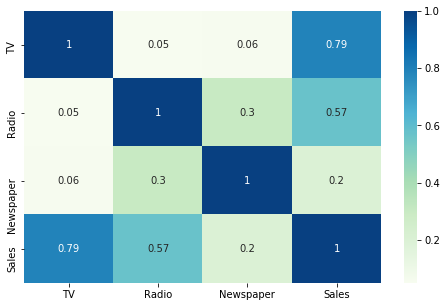

In [28]:
corr = data.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(round(data[['TV', 'Radio', 'Newspaper', 'Sales']].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

___
## Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot.

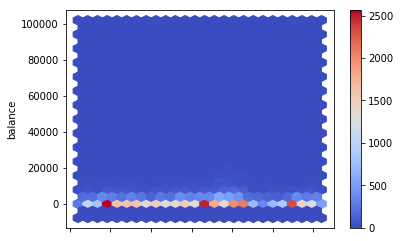

In [119]:
df.plot.hexbin(x='day', y='balance', gridsize=25, cmap='coolwarm')

___
## legend

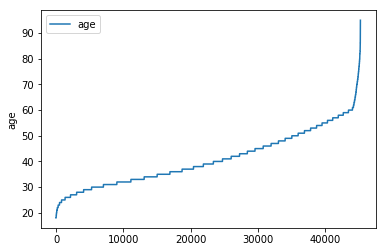

In [122]:
df1 = df.sort_values(by='age').reset_index()
ax = df1.plot.line(y='age')
ax.set(xlabel='', ylabel='age')
ax.legend(loc=0)

<pre>
LOCATION CODE LOCATION STRING
    0	       'best'
	1	       'upper right'
	2	       'upper left'
	3	       'lower left'
	4	       'lower right'
	5	       'right'
	6	       'center left'
	7	       'center right'
	8	       'lower center'
	9	       'upper center'
	10	      'center'
</pre>

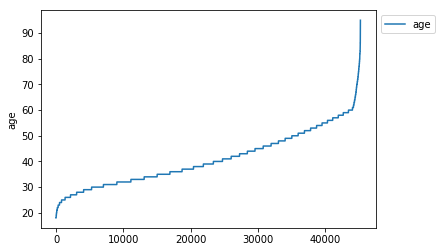

In [125]:
# shift legend outside the plot
ax = df1.plot.line(y='age')
ax.set(xlabel='', ylabel='age')
ax.legend(loc=0, bbox_to_anchor=(1.0,1.0));